In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv('/content/diabetes.csv')

In [79]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


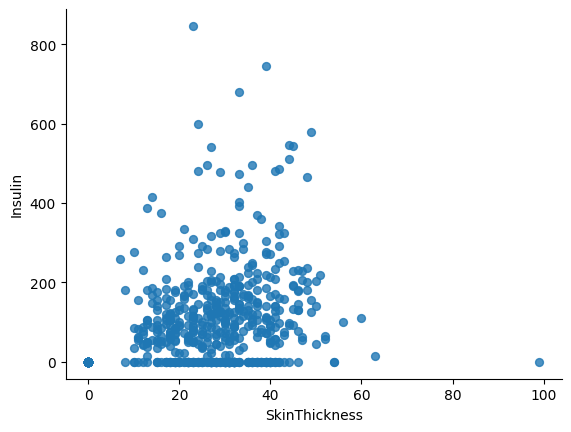

In [80]:
# @title SkinThickness vs Insulin

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='SkinThickness', y='Insulin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

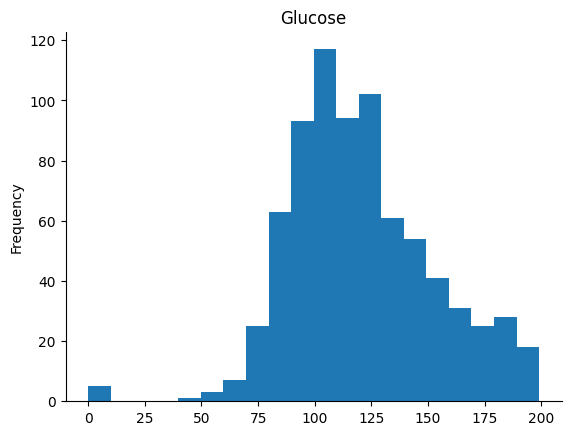

In [81]:
# @title Glucose

from matplotlib import pyplot as plt
df['Glucose'].plot(kind='hist', bins=20, title='Glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [82]:
df.corr()['Outcome']

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [83]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [85]:
X = scaler.fit_transform(X)

In [86]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [22]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8175 - loss: 0.3769 - val_accuracy: 0.7338 - val_loss: 0.5530
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7888 - loss: 0.4341 - val_accuracy: 0.7338 - val_loss: 0.5528
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8127 - loss: 0.3924 - val_accuracy: 0.7403 - val_loss: 0.5537
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8389 - loss: 0.3810 - val_accuracy: 0.7338 - val_loss: 0.5535
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8320 - loss: 0.3823 - val_accuracy: 0.7273 - val_loss: 0.5541
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8189 - loss: 0.3928 - val_accuracy: 0.7273 - val_loss: 0.5535
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7899 - loss: 0.4176 - val_accuracy: 0.7273 - val_loss: 0.5535
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8296 - loss: 0.3955 - val_accuracy: 0.7273 - v

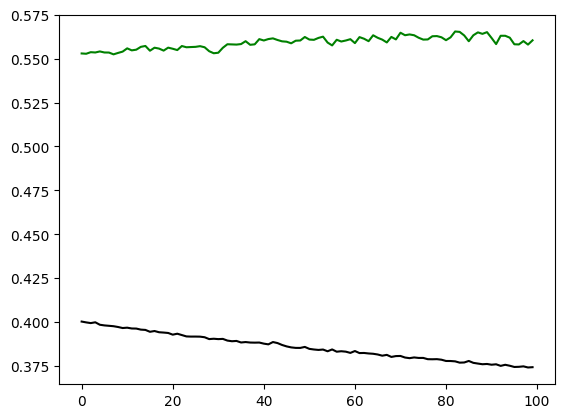

In [27]:
plt.plot(history.history['loss'], color='black')
plt.plot(history.history['val_loss'], color='green')
plt.show()

In [28]:
!pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 13.1 MB/s eta 0:00:00


In [31]:
import kerastuner as kt

In [66]:
def build_model(hp):

  model = keras.Sequential()
  counter = 0

  for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
    if counter == 0:
      model.add(Dense(hp.Int('units' + str(i), min_value=8, max_value=128, step=8),activation=hp.Choice('activation'+str(i), values=['relu', 'tanh']),input_dim=8))
    else:
      model.add(Dense(hp.Int('units' + str(i), min_value=8, max_value=128, step=8),activation=hp.Choice('activation'+str(i), values=['relu', 'tanh'])))

    counter += 1

  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd', 'adadelta', 'nadam']),loss='binary_crossentropy',metrics=['accuracy'])

  return model


In [67]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    directory='mydir',
    project_name='diabetes7'
)

Reloading Tuner from mydir/diabetes7/tuner0.json


In [68]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

In [69]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'units0': 64,
 'activation0': 'tanh',
 'optimizer': 'sgd',
 'units1': 8,
 'activation1': 'relu'}

In [70]:


def build_model(hp):
    model = keras.Sequential()
    num_layers = hp.Int('num_layers', min_value=1, max_value=10)  # Number of layers
    for i in range(num_layers):
        # For the first layer, we need to specify input_dim explicitly
        if i == 0:
            model.add(Dense(
                hp.Int('units' + str(i), min_value=8, max_value=128, step=8),  # units for the layer
                activation=hp.Choice('activation' + str(i), values=['relu', 'tanh']),  # activation for the layer
                input_dim=8  # input dimension for the first layer
            ))
        else:
            model.add(Dense(
                hp.Int('units' + str(i), min_value=8, max_value=128, step=8),  # units for the layer
                activation=hp.Choice('activation' + str(i), values=['relu', 'tanh'])  # activation for the layer
            ))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # Binary classification (sigmoid output)

    # Compile the model
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd', 'adadelta', 'nadam']),  # optimizer selection
        loss='binary_crossentropy',  # binary classification loss
        metrics=['accuracy']  # accuracy metric
    )

    return model


In [71]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    directory='mydir',
    project_name='diabetes8'
)

# Search over the training data
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters()[0].values
print(best_hyperparameters)


Trial 3 Complete [00h 00m 08s]
val_accuracy: 0.7402597665786743

Best val_accuracy So Far: 0.7727272510528564
Total elapsed time: 00h 00m 22s
{'num_layers': 1, 'units0': 128, 'activation0': 'relu', 'optimizer': 'nadam', 'units1': 64, 'activation1': 'relu', 'units2': 104, 'activation2': 'tanh', 'units3': 104, 'activation3': 'tanh', 'units4': 64, 'activation4': 'relu', 'units5': 64, 'activation5': 'relu', 'units6': 112, 'activation6': 'tanh', 'units7': 24, 'activation7': 'tanh', 'units8': 48, 'activation8': 'relu'}


In [72]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'units0': 128,
 'activation0': 'relu',
 'optimizer': 'nadam',
 'units1': 64,
 'activation1': 'relu',
 'units2': 104,
 'activation2': 'tanh',
 'units3': 104,
 'activation3': 'tanh',
 'units4': 64,
 'activation4': 'relu',
 'units5': 64,
 'activation5': 'relu',
 'units6': 112,
 'activation6': 'tanh',
 'units7': 24,
 'activation7': 'tanh',
 'units8': 48,
 'activation8': 'relu'}

In [59]:
# Format and print the hyperparameters in the desired order
num_layers = best_hyperparameters['num_layers']
print(f"Best Hyperparameters (Number of layers: {num_layers}):")

# Print the layers' units and activations
for i in range(num_layers):
    units = best_hyperparameters[f'units{i}']
    activation = best_hyperparameters[f'activation{i}']
    print(f"Layer {i + 1}: Units = {units}, Activation = {activation}")

# Print the details for the output (last) layer
print("\nDetails for the Output Layer:")
output_units = best_hyperparameters['units' + str(num_layers - 1)]  # units for the last layer
output_activation = 'sigmoid'  # Since output layer is always sigmoid
print(f"Output Layer: Units = {output_units}, Activation = {output_activation}")

# Print the optimizer and loss function used
optimizer = best_hyperparameters['optimizer']
loss_function = 'binary_crossentropy'  # As it's a binary classification task
print(f"\nOptimizer: {optimizer}")
print(f"Loss Function: {loss_function}")

Best Hyperparameters (Number of layers: 7):
Layer 1: Units = 80, Activation = relu
Layer 2: Units = 56, Activation = relu
Layer 3: Units = 64, Activation = relu
Layer 4: Units = 40, Activation = tanh
Layer 5: Units = 40, Activation = tanh
Layer 6: Units = 72, Activation = relu
Layer 7: Units = 72, Activation = tanh

Details for the Output Layer:
Output Layer: Units = 72, Activation = sigmoid

Optimizer: rmsprop
Loss Function: binary_crossentropy


In [75]:
pip install keras tensorflow keras-tuner


In [118]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Define HyperModel class for Keras Tuner
class ANNHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()

        # Input layer (input_dim is set to the number of features in x_train)
        model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))

        # Number of layers: Try 1 to 5 layers
        num_layers = hp.Int('num_layers', min_value=1, max_value=5, step=1)

        for i in range(num_layers):
            # Number of units in each layer: between 32 and 512, in powers of 2
            units = hp.Int(f'units_{i}', min_value=8, max_value=128, step=8)
            # Activation function: Choose from ReLU, Tanh, Sigmoid
            activation = hp.Choice(f'activation_{i}', values=['relu', 'tanh', 'sigmoid'])

            dropout = hp.Choice(f'dropout{i}', values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

            model.add(Dense(units, activation=activation))
            model.add(Dropout(dropout))

        # Output layer with 1 unit for binary classification
        model.add(Dense(1, activation='sigmoid'))

        # Optimizer: Try Adam, RMSprop, Nadam
        optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'nadam'])

        model.compile(
            optimizer=optimizer,
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        return model


# Define the tuner
tuner = RandomSearch(
    ANNHyperModel(),
    objective='val_accuracy',  # You could use 'val_loss' as well
    max_trials=10,              # Number of random combinations to try
    executions_per_trial=1,     # Number of executions for each trial
    directory='output',         # Directory to store results
    project_name='ANN_tuning4'
)

# Perform the search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


# # Build the model with the best hyperparameters
# best_model = tuner.hypermodel.build(best_hyperparameters)

# # Train the best model
# best_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# # Evaluate the model on test data
# test_loss, test_acc = best_model.evaluate(x_test, y_test)
# print(f'Test accuracy: {test_acc}')


Trial 10 Complete [00h 00m 15s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.798701286315918
Total elapsed time: 00h 01m 59s


In [119]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'units_0': 80,
 'activation_0': 'tanh',
 'dropout0': 0.6,
 'optimizer': 'rmsprop',
 'units_1': 16,
 'activation_1': 'tanh',
 'dropout1': 0.2,
 'units_2': 48,
 'activation_2': 'relu',
 'dropout2': 0.4,
 'units_3': 16,
 'activation_3': 'relu',
 'dropout3': 0.4}

In [107]:
model = tuner.get_best_models(num_models=1)[0]

In [108]:
history = model.fit(X_train, y_train, epochs=200, initial_epoch=5, validation_data=(X_test,y_test))

Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.7666 - loss: 0.5276 - val_accuracy: 0.7532 - val_loss: 0.5184
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7647 - loss: 0.4943 - val_accuracy: 0.7662 - val_loss: 0.5105
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7746 - loss: 0.4669 - val_accuracy: 0.7273 - val_loss: 0.5141
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7543 - loss: 0.5099 - val_accuracy: 0.7597 - val_loss: 0.5063
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7651 - loss: 0.4771 - val_accuracy: 0.7532 - val_loss: 0.5061
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7533 - loss: 0.4884 - val_accuracy: 0.7597 - val_loss: 0.5046
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7705 - loss: 0.4832 - val_accuracy: 0.7532 - val_loss: 0.5076
Epoch 13/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7638 - loss: 0.5049 - val_accuracy: 0.759

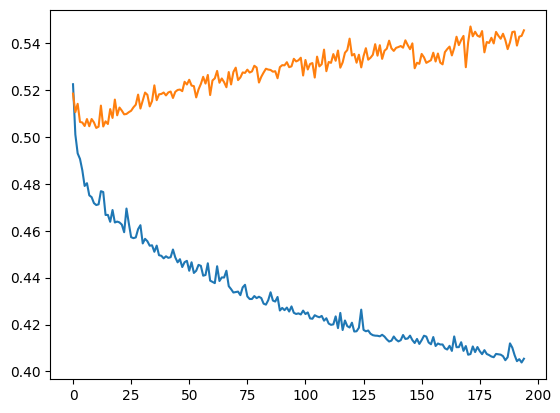

In [109]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [120]:
model = Sequential()
model.add(Dense(16, activation='tanh', input_dim=8))
model.add(Dropout(0.2))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.4338 - loss: 0.7922 - val_accuracy: 0.5974 - val_loss: 0.6727
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5514 - loss: 0.6979 - val_accuracy: 0.6883 - val_loss: 0.6296
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6384 - loss: 0.6410 - val_accuracy: 0.7078 - val_loss: 0.6014
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6777 - loss: 0.6131 - val_accuracy: 0.7143 - val_loss: 0.5738
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6870 - loss: 0.5970 - val_accuracy: 0.7273 - val_loss: 0.5539
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7237 - loss: 0.5637 - val_accuracy: 0.7338 - val_loss: 0.5374
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7372 - loss: 0.5367 - val_accuracy: 0.7273 - val_loss: 0.5251
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7643 - loss: 0.5039 - val_accuracy: 0.7403 -

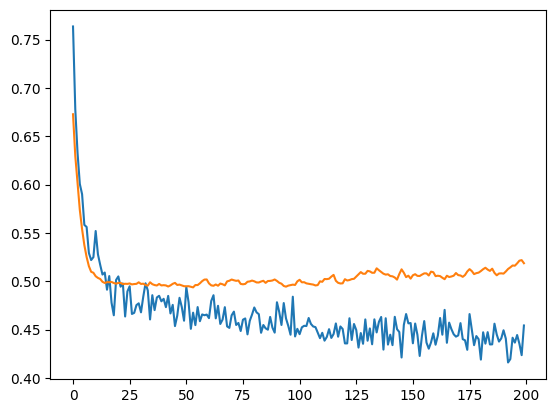

In [121]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])